In [1]:
from qiskit import*
import qiskit
from qiskit.scheduler import measure
from qiskit.pulse.instructions import Play, Acquire
from qiskit import pulse
from qiskit.pulse import Drag, Gaussian, GaussianSquare


In [2]:
%matplotlib inline
import random
import math
import numpy as np
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

import numpy as np

from qiskit.providers.aer.noise import NoiseModel
from qiskit.aqua import QuantumInstance
from qiskit.providers.aer.noise import thermal_relaxation_error, ReadoutError, depolarizing_error

provider = IBMQ.get_provider(hub='ibm-q-education', group = 'rutgers-uni-Schn', project= 'vqe-research')
machine = provider.get_backend('ibmq_casablanca')
# from qiskit.test.mock import FakeLondon
# machine = FakeLondon()
machine_noise_model = NoiseModel.from_backend(machine)
simulator = Aer.get_backend('qasm_simulator')


basis_gates = machine_noise_model.basis_gates

C:\Users\isido\anaconda3\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


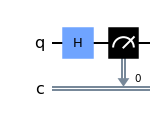

In [3]:
circ = QuantumCircuit(1,1)
circ.h(0)
# circ.cx(0,1)
circ.measure(0,0)
# circ.measure(1,1)
circ.draw(output = 'mpl')

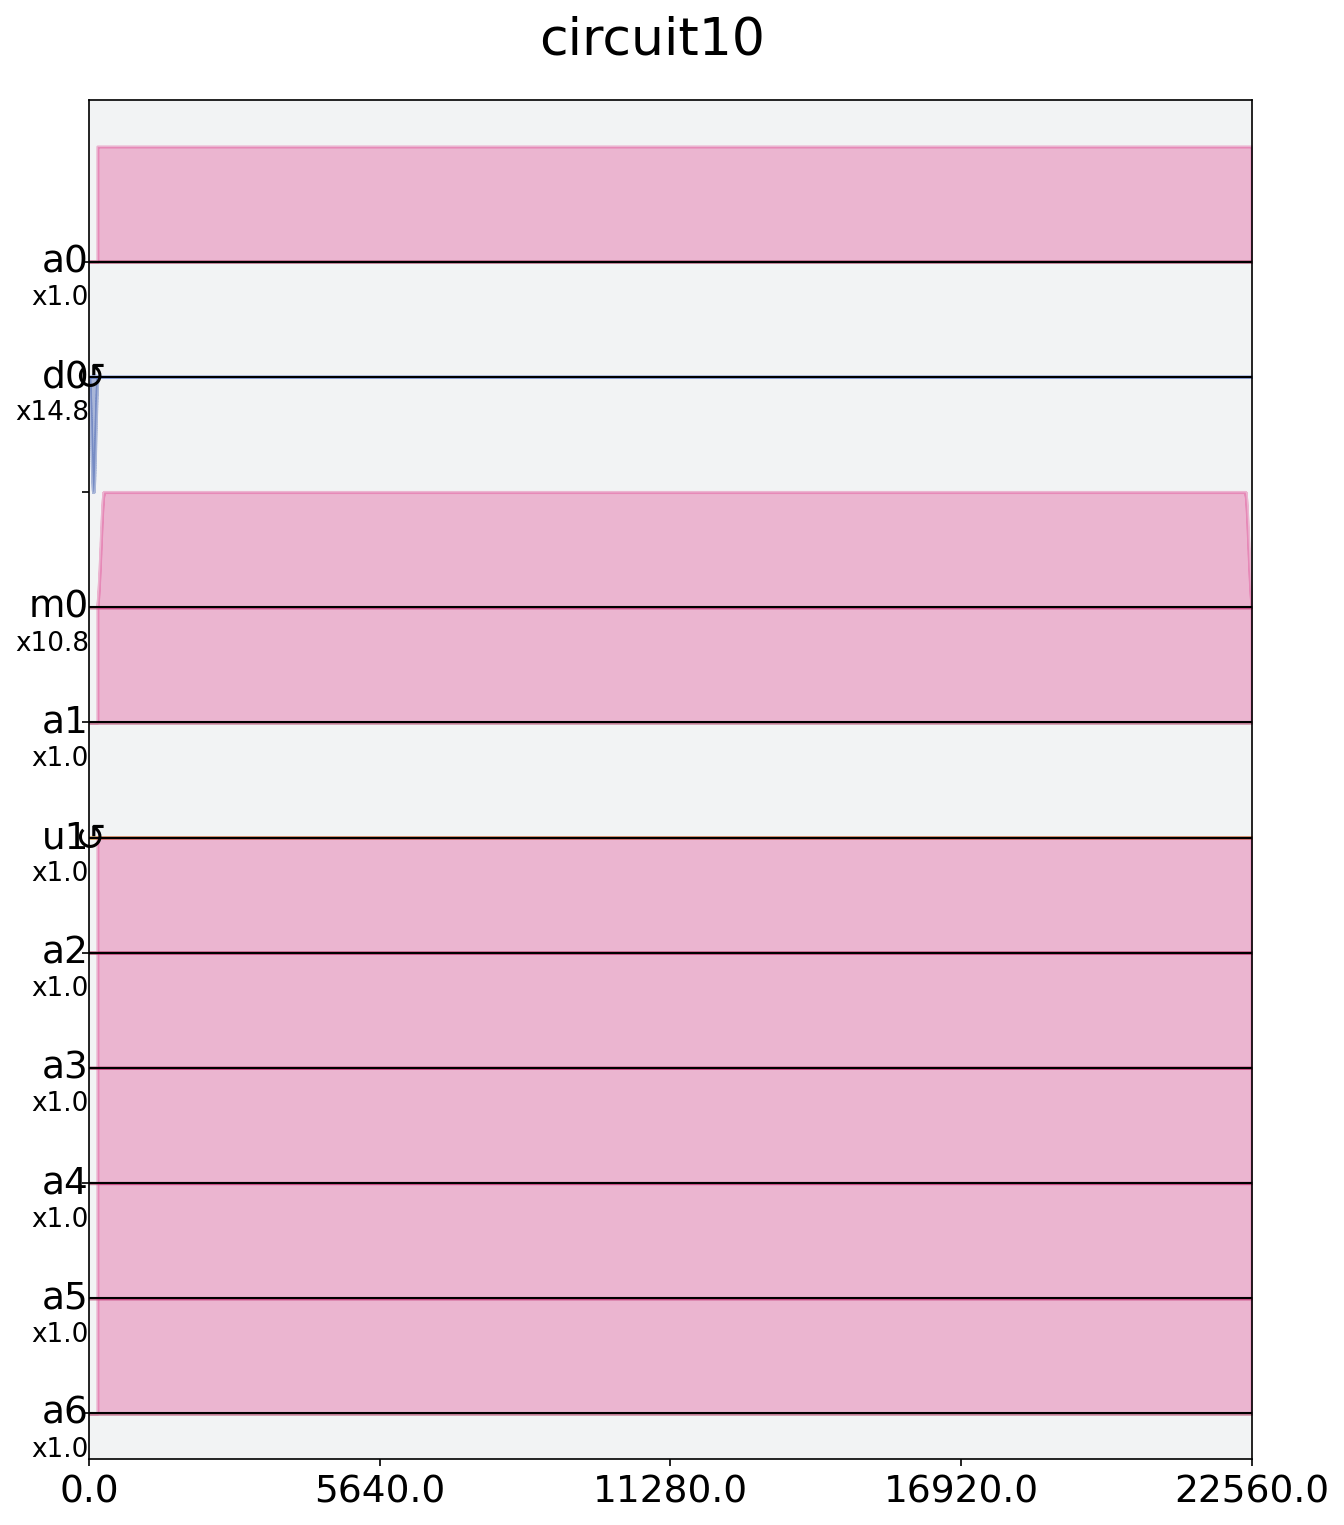

In [4]:
circ_device = transpile(circ, machine)
sched_circ = schedule(circ_device, machine)
sched_circ.draw()

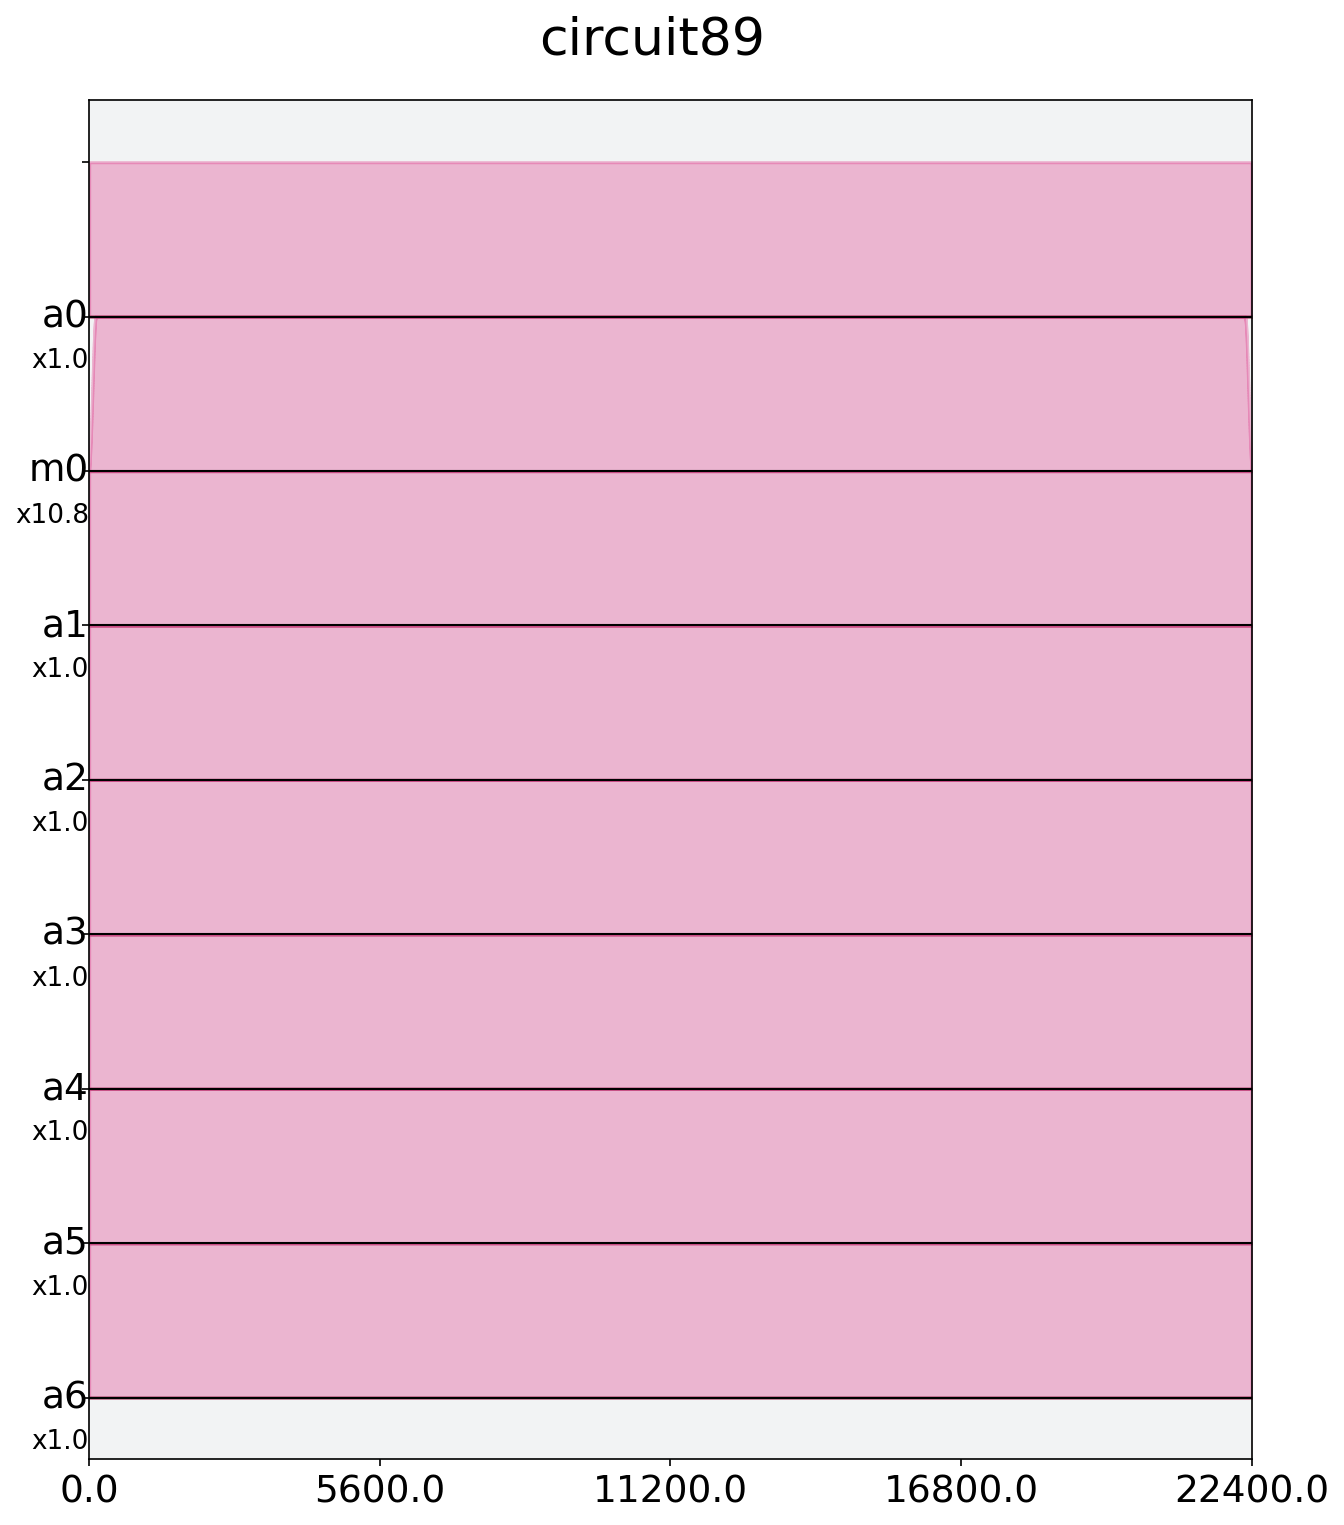

In [5]:
circ2 = QuantumCircuit(1,1)
circ2.h(0)
circ2.h(0)
circ2.h(0)
circ2.h(0)
# circ.cx(0,1)
circ2.measure(0,0)

circ_device2 = transpile(circ2, machine)
sched_circ2 = schedule(circ_device2, machine)
sched_circ2.draw()

In [6]:
experiments= [sched_circ, sched_circ2]

In [7]:
from qiskit.tools.monitor import job_monitor
job = execute(experiments, backend = machine, shots=8192)
job_monitor(job)
job.result()

KeyboardInterrupt: 

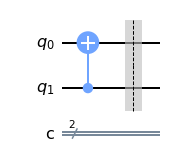

In [8]:
circ = QuantumCircuit(2,2)
#circ.x(1)
circ.cx(1,0)
circ.barrier(0,1)
# circ.cx(0,1)
# circ.barrier(0,1)
# circ.cx(0,1)
circ.draw(output = 'mpl')

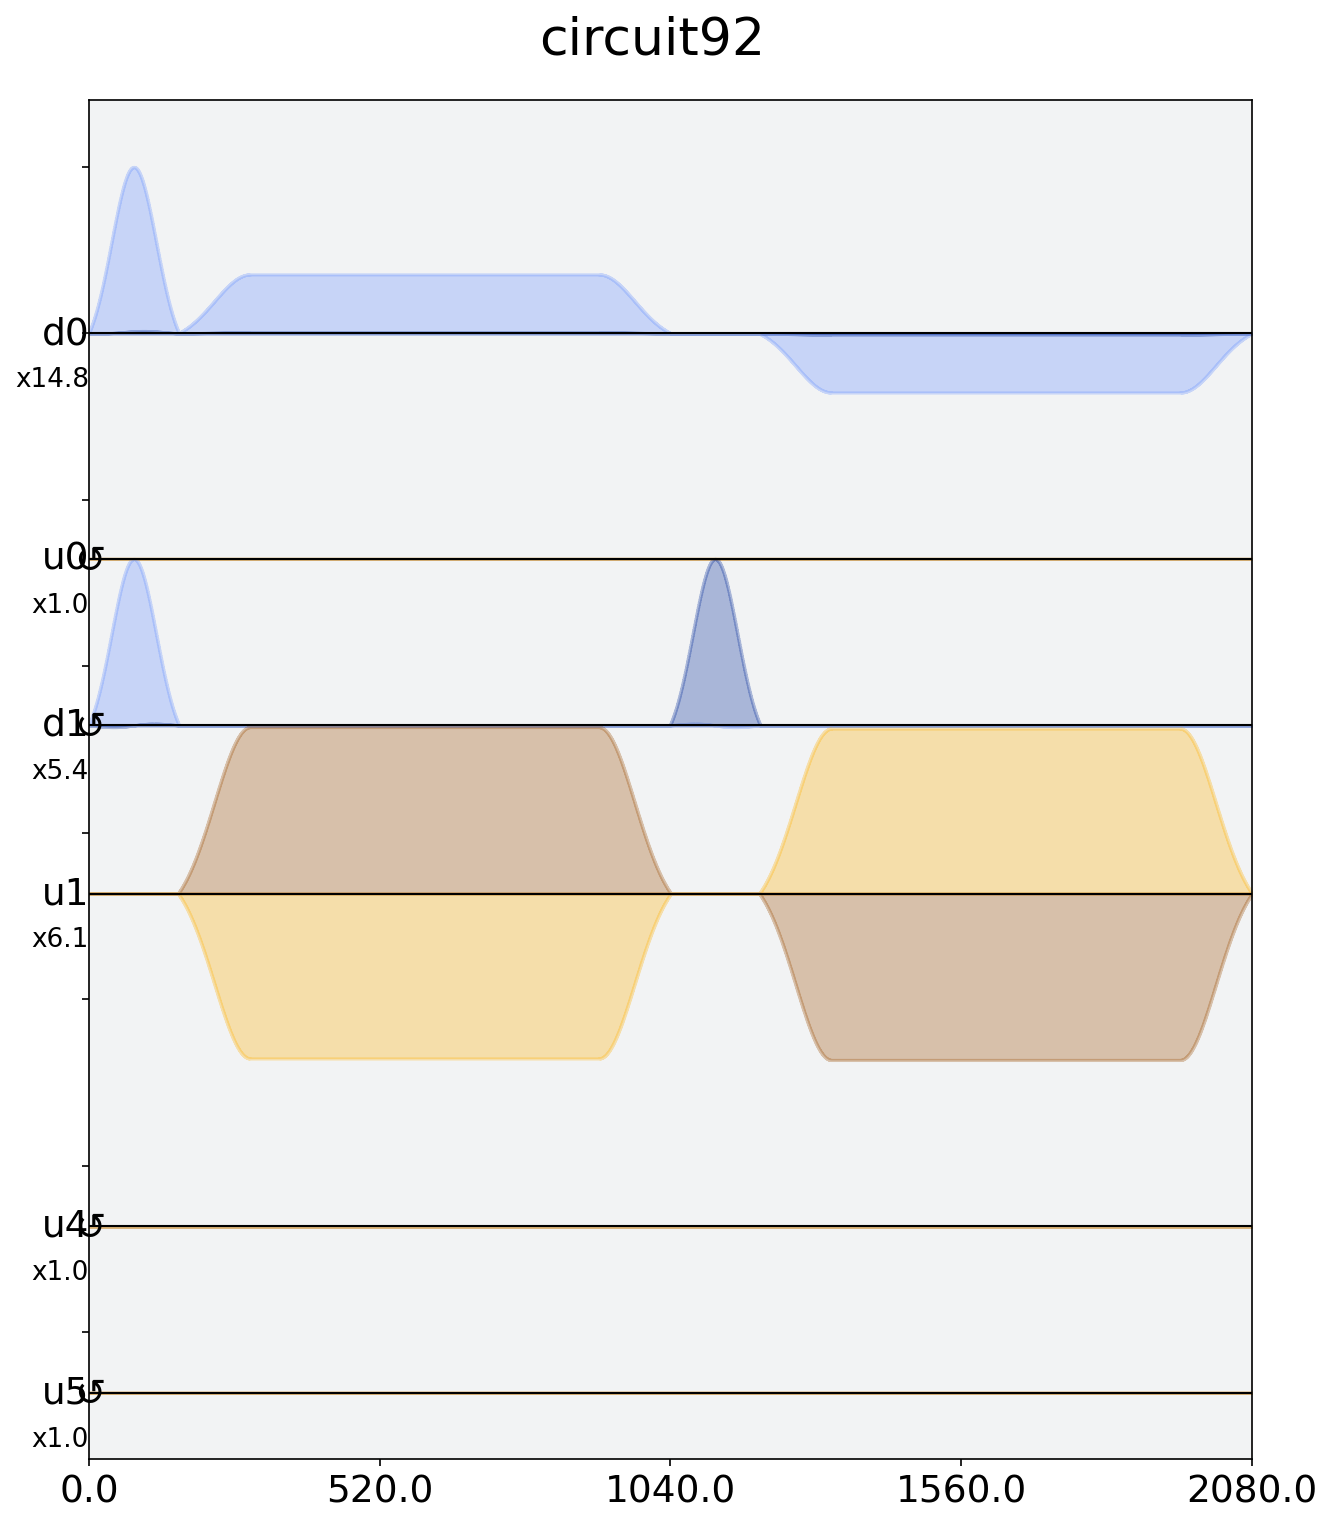

In [9]:
circ_device = transpile(circ, machine)
sched_circ = schedule(circ_device, machine)
sched_circ.draw()

In [10]:
sched_circ

Schedule((0, ShiftPhase(1.5707963267948966, DriveChannel(1))), (0, ShiftPhase(1.5707963267948966, ControlChannel(0))), (0, ShiftPhase(1.5707963267948966, ControlChannel(4))), (0, ShiftPhase(1.5707963267948966, ControlChannel(5))), (0, Play(Drag(duration=160, amp=(0.06747485985764538+0.0008529866714649207j), sigma=40, beta=-0.3321211778384269), DriveChannel(0))), (0, Play(Drag(duration=160, amp=(-3.4097856292924276e-17-0.18562008418353512j), sigma=40, beta=-0.7307519533928025), DriveChannel(1))), (160, Play(GaussianSquare(duration=880, amp=(0.02393060848436737+0.0004950796954260698j), sigma=64, width=624), DriveChannel(0))), (160, Play(GaussianSquare(duration=880, amp=(-0.16137275174161397+0.16282590503004865j), sigma=64, width=624), ControlChannel(1))), (1040, Play(Drag(duration=160, amp=(0.18562008418353512+0j), sigma=40, beta=-0.7307519533928025), DriveChannel(1))), (1200, Play(GaussianSquare(duration=880, amp=(-0.02393060848436737-0.0004950796954260668j), sigma=64, width=624), Drive

In [11]:
sched_circ.instructions[1]

(0, ShiftPhase(1.5707963267948966, ControlChannel(0)))

In [12]:
instrucs = sched_circ.instructions

In [13]:
new_sched = qiskit.pulse.Schedule(name = "Schedule stretched")

In [14]:
for instruc_paren in instrucs:
        instruc = instruc_paren[1]
        print(instruc)

ShiftPhase(1.5707963267948966, DriveChannel(1))
ShiftPhase(1.5707963267948966, ControlChannel(0))
ShiftPhase(1.5707963267948966, ControlChannel(4))
ShiftPhase(1.5707963267948966, ControlChannel(5))
Play(Drag(duration=160, amp=(0.06747485985764538+0.0008529866714649207j), sigma=40, beta=-0.3321211778384269), DriveChannel(0))
Play(Drag(duration=160, amp=(-3.4097856292924276e-17-0.18562008418353512j), sigma=40, beta=-0.7307519533928025), DriveChannel(1))
Play(GaussianSquare(duration=880, amp=(0.02393060848436737+0.0004950796954260698j), sigma=64, width=624), DriveChannel(0))
Play(GaussianSquare(duration=880, amp=(-0.16137275174161397+0.16282590503004865j), sigma=64, width=624), ControlChannel(1))
Play(Drag(duration=160, amp=(0.18562008418353512+0j), sigma=40, beta=-0.7307519533928025), DriveChannel(1))
Play(GaussianSquare(duration=880, amp=(-0.02393060848436737-0.0004950796954260668j), sigma=64, width=624), DriveChannel(0))
Play(GaussianSquare(duration=880, amp=(0.16137275174161395-0.1628

In [15]:
from qiskit import pulse
def stretchSchedule_singleQ(sched, factor, machine):
    # args:circuit in pulse form WITHOUT measurement, stretch factor
    #output: pulses stretched by thefactor
    
    instrucs = sched.instructions
    new_sched = qiskit.pulse.Schedule(name = "Schedule stretched by factor " + str(factor))
    
    #Only stretching the sample pulse, doing nothing to shiftphase, measurement,etc.
    j = len(instrucs)
    while (i<j):
        instruc_paren = instrucs[i]
        i+=1
        instruc = instruc_paren[1]
        #if drag/gaussian square ....ignore gaussian, only add drag
        if (isinstance(instruc, Play)):
            
            #print(instruc)
            
            if (isinstance(instruc.pulse, Drag)):
                drag = instruc.pulse
                ## param = {"duration": self.duration, "amp": self.amp, "sigma": self.sigma, "width": self.width}
                param = drag.parameters
                #print("Initial Param")
                #print(param)
                #print("final Param")
                #print('Duration' + str(factor*param['duration']))

                #stretching the drag pulse
                s_pulse = Drag(int(factor*param['duration']), param['amp']/factor, factor*param['sigma'] ,param['beta'] )
                channel = instruc.channels[0]
                new_sched = new_sched.append(pulse.Play(s_pulse, channel))
                
            if (isinstance(instruc.pulse, GaussianSquare)):
                
                gauss = instruc.pulse
                ## param = {"duration": self.duration, "amp": self.amp, "sigma": self.sigma, "width": self.width}
                param = gauss.parameters
                print('Gaussian Parameters------------------------')
                print(param)

                #stretching the drag pulse
                s_pulse = GaussianSquare(int(factor*param['duration']), param['amp']/factor, factor*param['sigma'],factor*param['width'])
                channel = instruc.channels[0]
                new_sched = new_sched.append(pulse.Play(s_pulse, channel))
        
        #if not acquire    
        elif ( not isinstance(instruc, Acquire)):
            new_sched+= instruc
    return new_sched

In [16]:
scheddy = stretchSchedule_singleQ(sched_circ, 3, machine)

UnboundLocalError: local variable 'i' referenced before assignment

In [17]:
scheddy.draw()

NameError: name 'scheddy' is not defined

In [18]:
scheddy

NameError: name 'scheddy' is not defined

In [19]:
scheddy.duration

NameError: name 'scheddy' is not defined

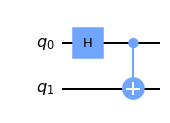

In [20]:
circ = QuantumCircuit(2)
circ.h(0)
circ.cx(0,1)
circ.draw(output = 'mpl')

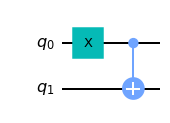

In [21]:
circ2 = QuantumCircuit(2)
circ2.x(0)
circ2.cx(0,1)
circ2.draw(output = 'mpl')

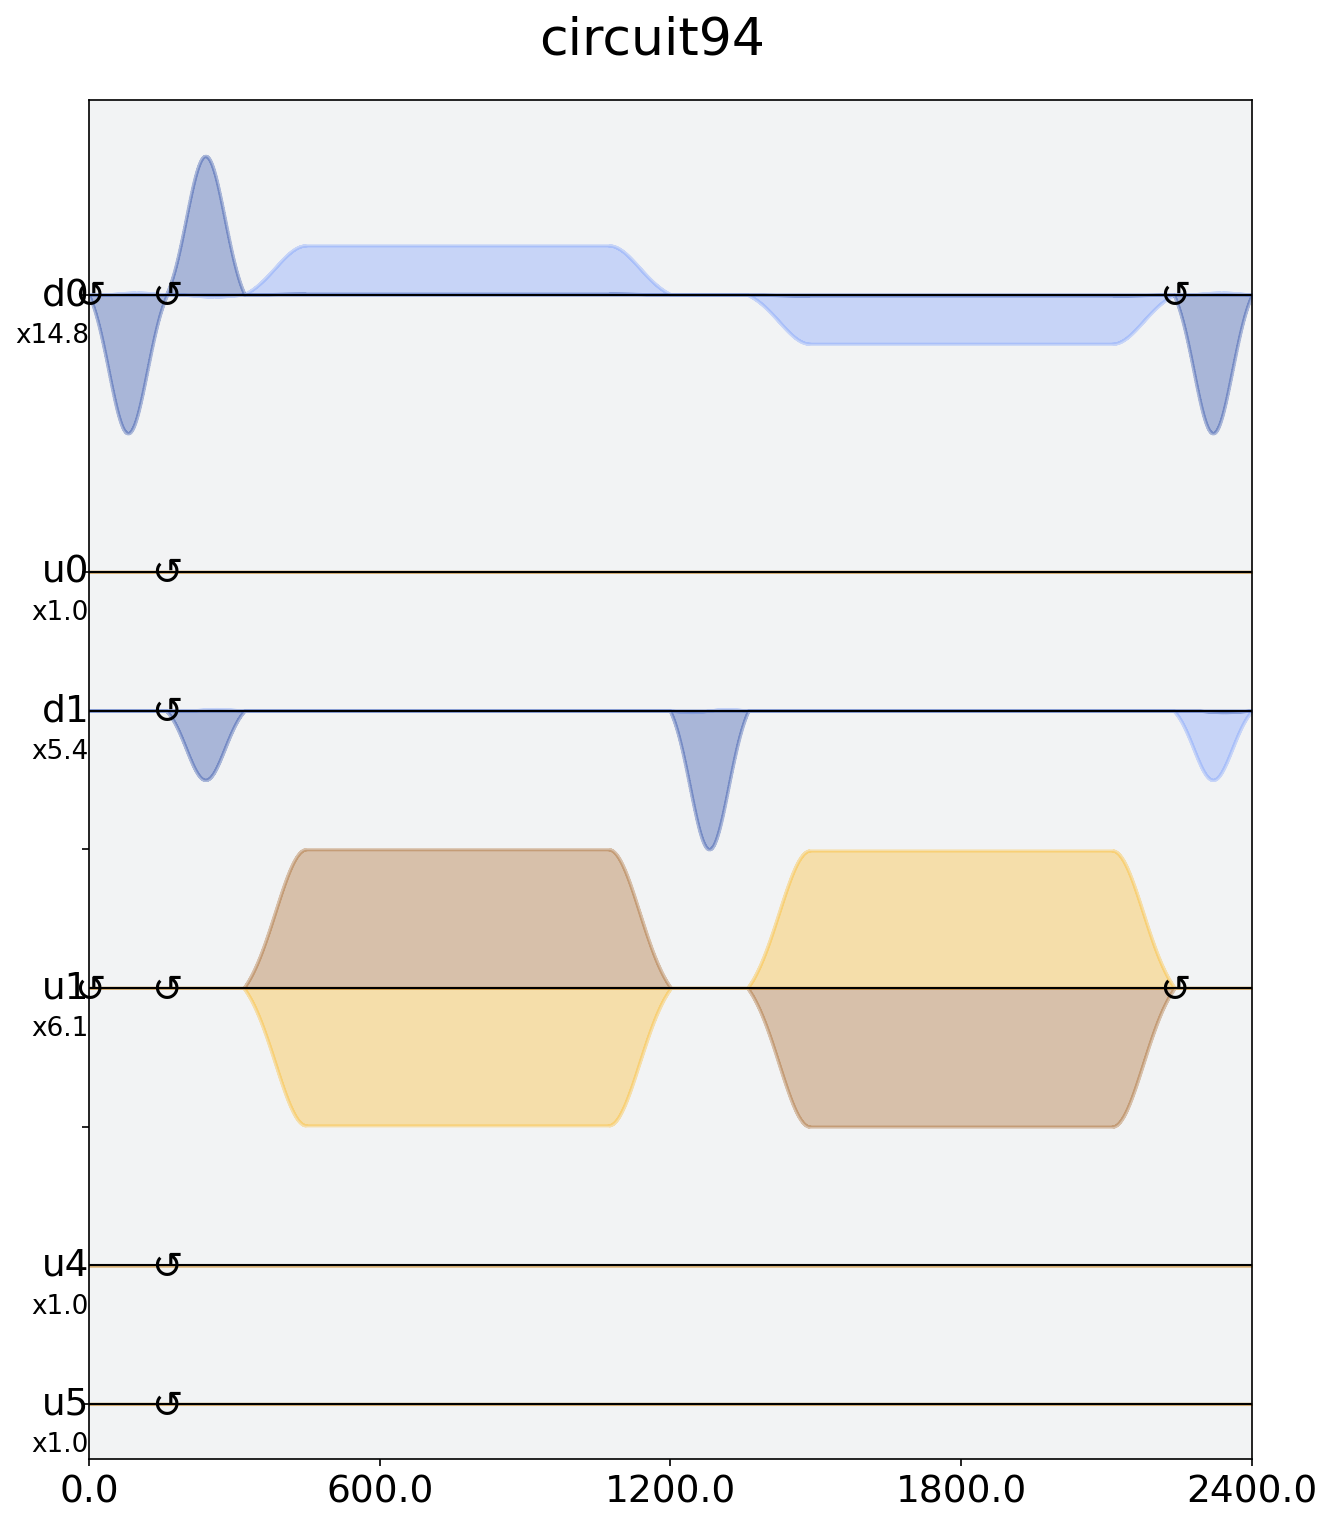

In [22]:
circ_device = transpile(circ, machine)
sched_circ = schedule(circ_device, machine)
sched_circ.draw()

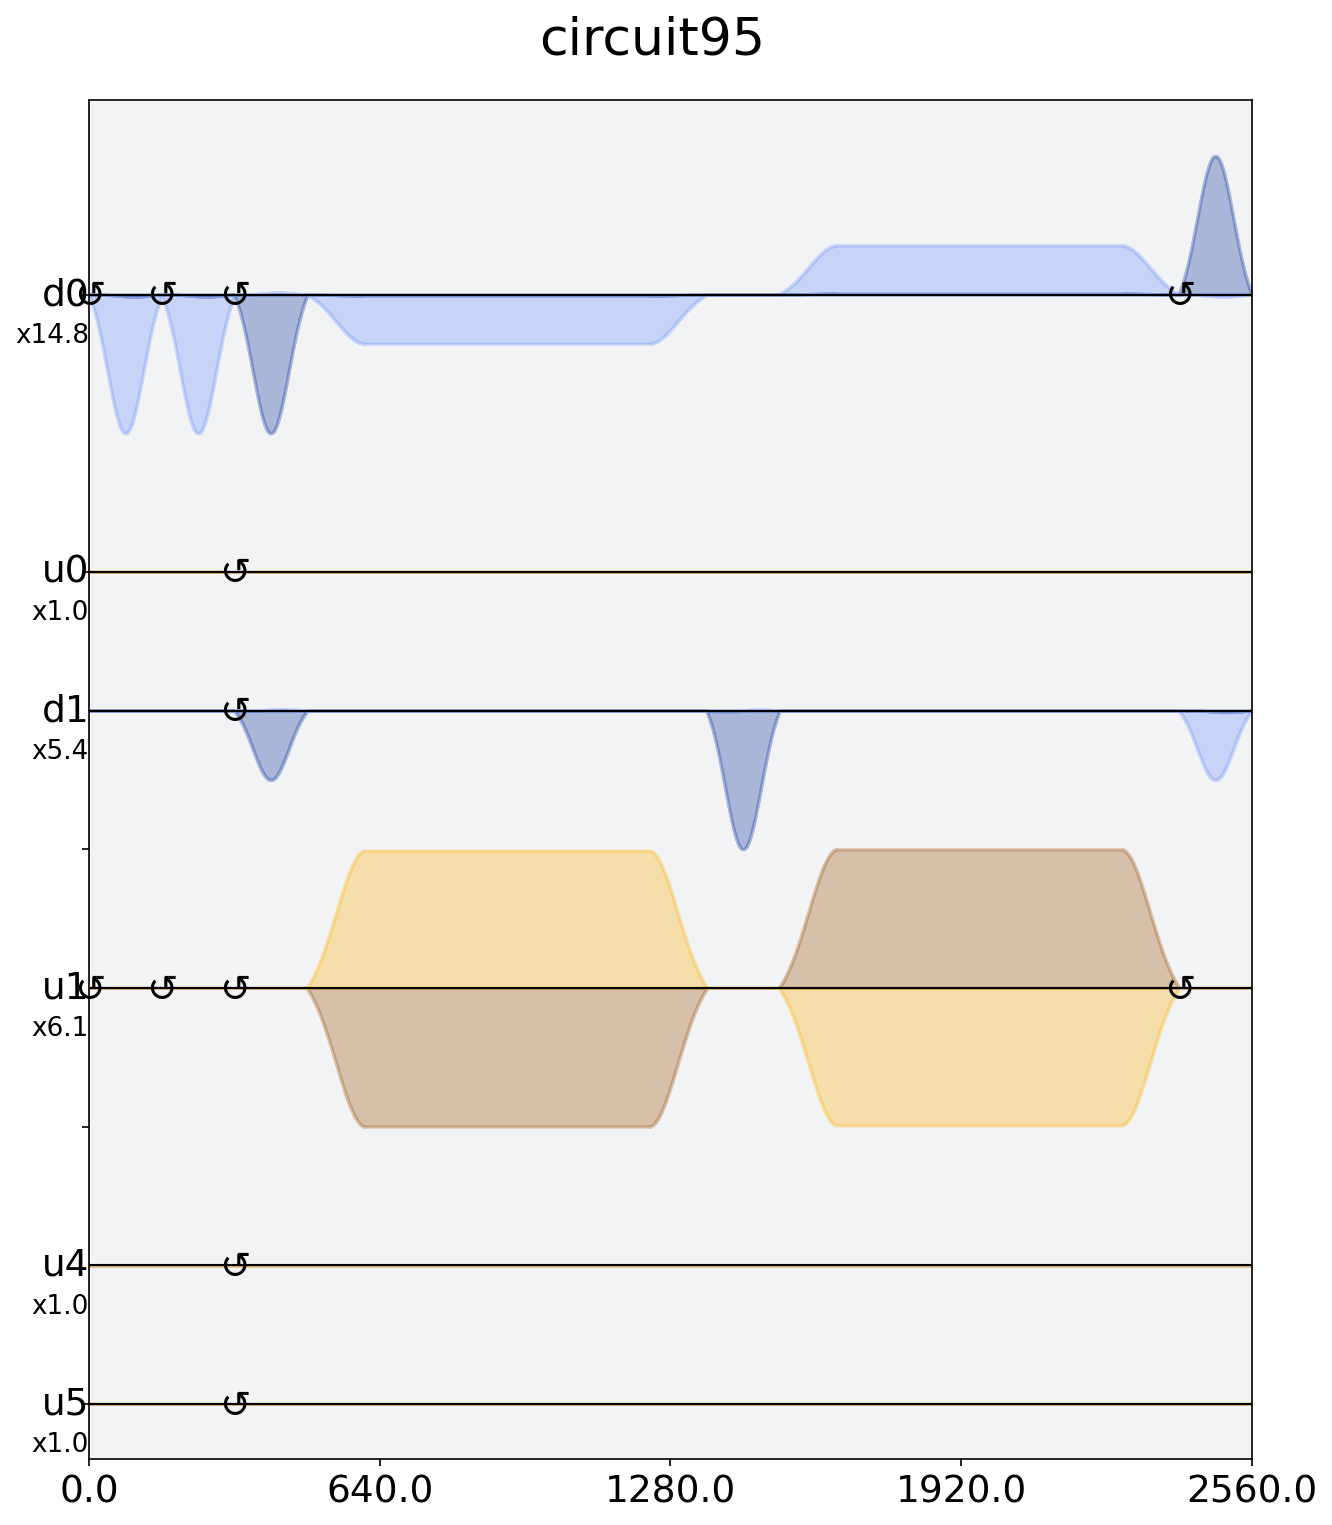

In [23]:
circ_device2 = transpile(circ2, machine)
sched_circ2 = schedule(circ_device2, machine)
sched_circ2.draw()

In [24]:
sched_circ3 = sched_circ.insert(sched_circ.duration, sched_circ2)

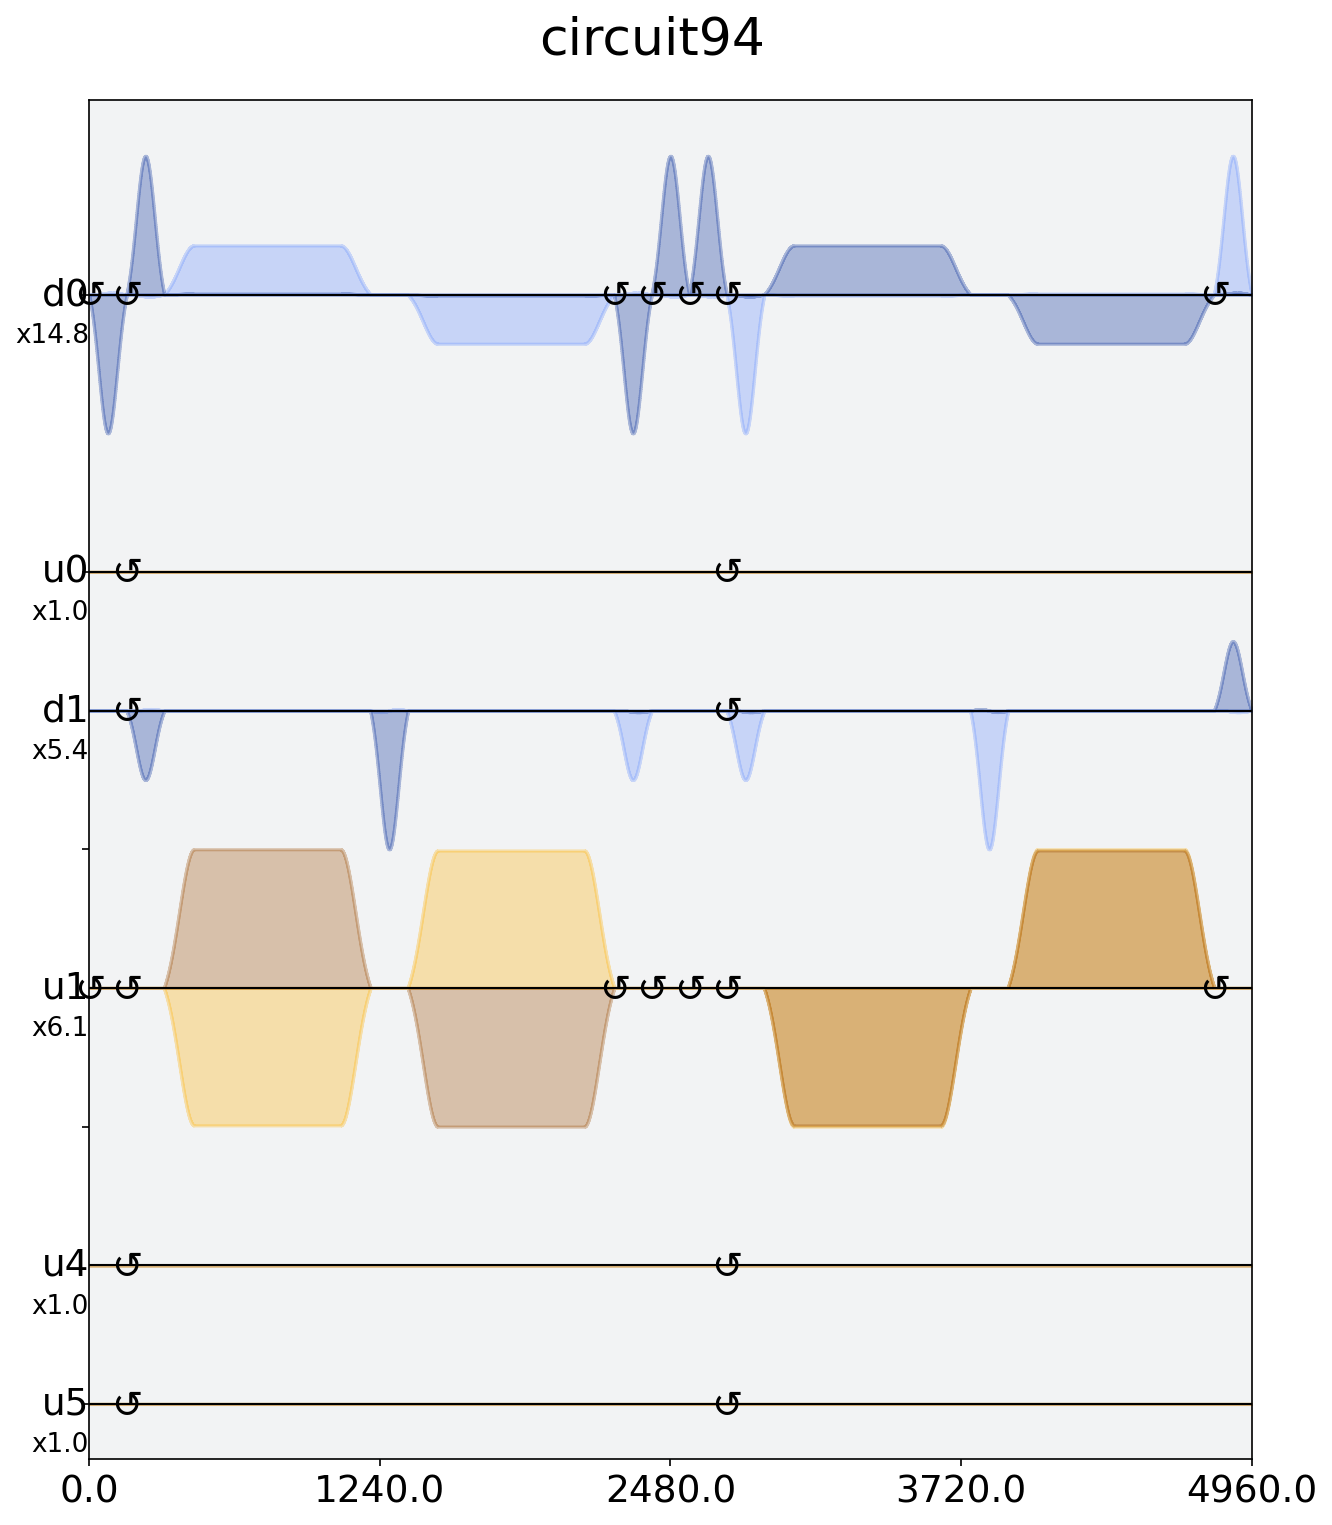

In [25]:
sched_circ3.draw()

In [26]:

def instruc_sorter(instrucs):
    '''
    Input: Array of instructions
    Output: Groups all same-time instrucs into smaller arrays and returns a big array containing those 
    smaller sub arrays (lol array lingo)
    
    
    Structure of instruc:
            (duration, pulse_instruction)
    '''
    big_array = []    #where all instruc arrays will be stored
    num_instrucs = len(instrucs)
    i = 0 # indexing instrucs
    while (i < num_instrucs):

        instruc = instrucs[i]
        time = instruc[0]
        array = []
        #adding in the instruction
        array.append(instruc[1])
        #appending index
        i+=1


        while(i<num_instrucs):
            instruc2 = instrucs[i]
            time2 = instruc2[0]
            if (time == time2):
                array.append(instruc2[1])
                i+=1
            else:
                break
        big_array.append(array)
    return big_array


In [27]:
i = instruc_sorter(sched_circ.instructions)

In [28]:
i[4]

[Play(GaussianSquare(duration=880, amp=(-0.02393060848436737-0.0004950796954260668j), sigma=64, width=624), DriveChannel(0)),
 Play(GaussianSquare(duration=880, amp=(0.16137275174161395-0.16282590503004868j), sigma=64, width=624), ControlChannel(1))]

In [49]:
def get_closest_multiple_of_16(num):
    return int(num + 8 ) - (int(num + 8 ) % 16)
def stretch_sub_sched(sim_pulse_array, factor):
    '''
    Input: A set of pulses happening at the same time (sim = simultaneous) and factor to be stretched by
    Output: A schedule consisting of the stretched pulses
    
    '''
    sub_sched = qiskit.pulse.Schedule()
    for instruc in sim_pulse_array:

        #anything except shift phase
        if (isinstance(instruc, Play)):

            if (isinstance(instruc.pulse, Drag)):
                drag = instruc.pulse
                ## param = {"duration": self.duration, "amp": self.amp, "sigma": self.sigma, "width": self.width}
                param = drag.parameters
                duration = get_closest_multiple_of_16(factor*param['duration'])
                sigma = get_closest_multiple_of_16(factor*param['sigma'])
                #stretching the drag pulse
                s_pulse = Drag(duration, param['amp']/factor, sigma ,param['beta'] )
                channel = instruc.channels[0]
                sub_sched = sub_sched.append(pulse.Play(s_pulse, channel))

            elif (isinstance(instruc.pulse, GaussianSquare)):

                gauss = instruc.pulse
                ## param = {"duration": self.duration, "amp": self.amp, "sigma": self.sigma, "width": self.width}
                param = gauss.parameters
                #print('------Old Param')
                #print(param)
                #stretching the drag pulse
                duration = get_closest_multiple_of_16(factor*param['duration'])
                sigma = get_closest_multiple_of_16(factor*param['sigma'])
                width = get_closest_multiple_of_16(factor*param['width'])
                s_pulse = GaussianSquare(duration, param['amp']/factor, sigma, width)
                #print('------new Param')
                #print('Duration')
                #print(str(duration) + ' '+ str(param['amp']/factor) + ' '+ str(sigma) + ' '+ str(width))
                
                #print(param)
                channel = instruc.channels[0]
                sub_sched = sub_sched.append(pulse.Play(s_pulse, channel))

            #if not acquire    
            elif ( not isinstance(instruc, Acquire)):
                sub_sched+= instruc
        else:
            sub_sched+= instruc
    return sub_sched

------Old Param
{'duration': 880, 'amp': (-0.02393060848436737-0.0004950796954260668j), 'sigma': 64, 'width': 624}
------new Param
1152 (-0.018408160372590285-0.00038083053494312834j) 80 816
------Old Param
{'duration': 880, 'amp': (0.16137275174161395-0.16282590503004868j), 'sigma': 64, 'width': 624}
------new Param
1152 (0.12413288595508765-0.12525069617696052j) 80 816


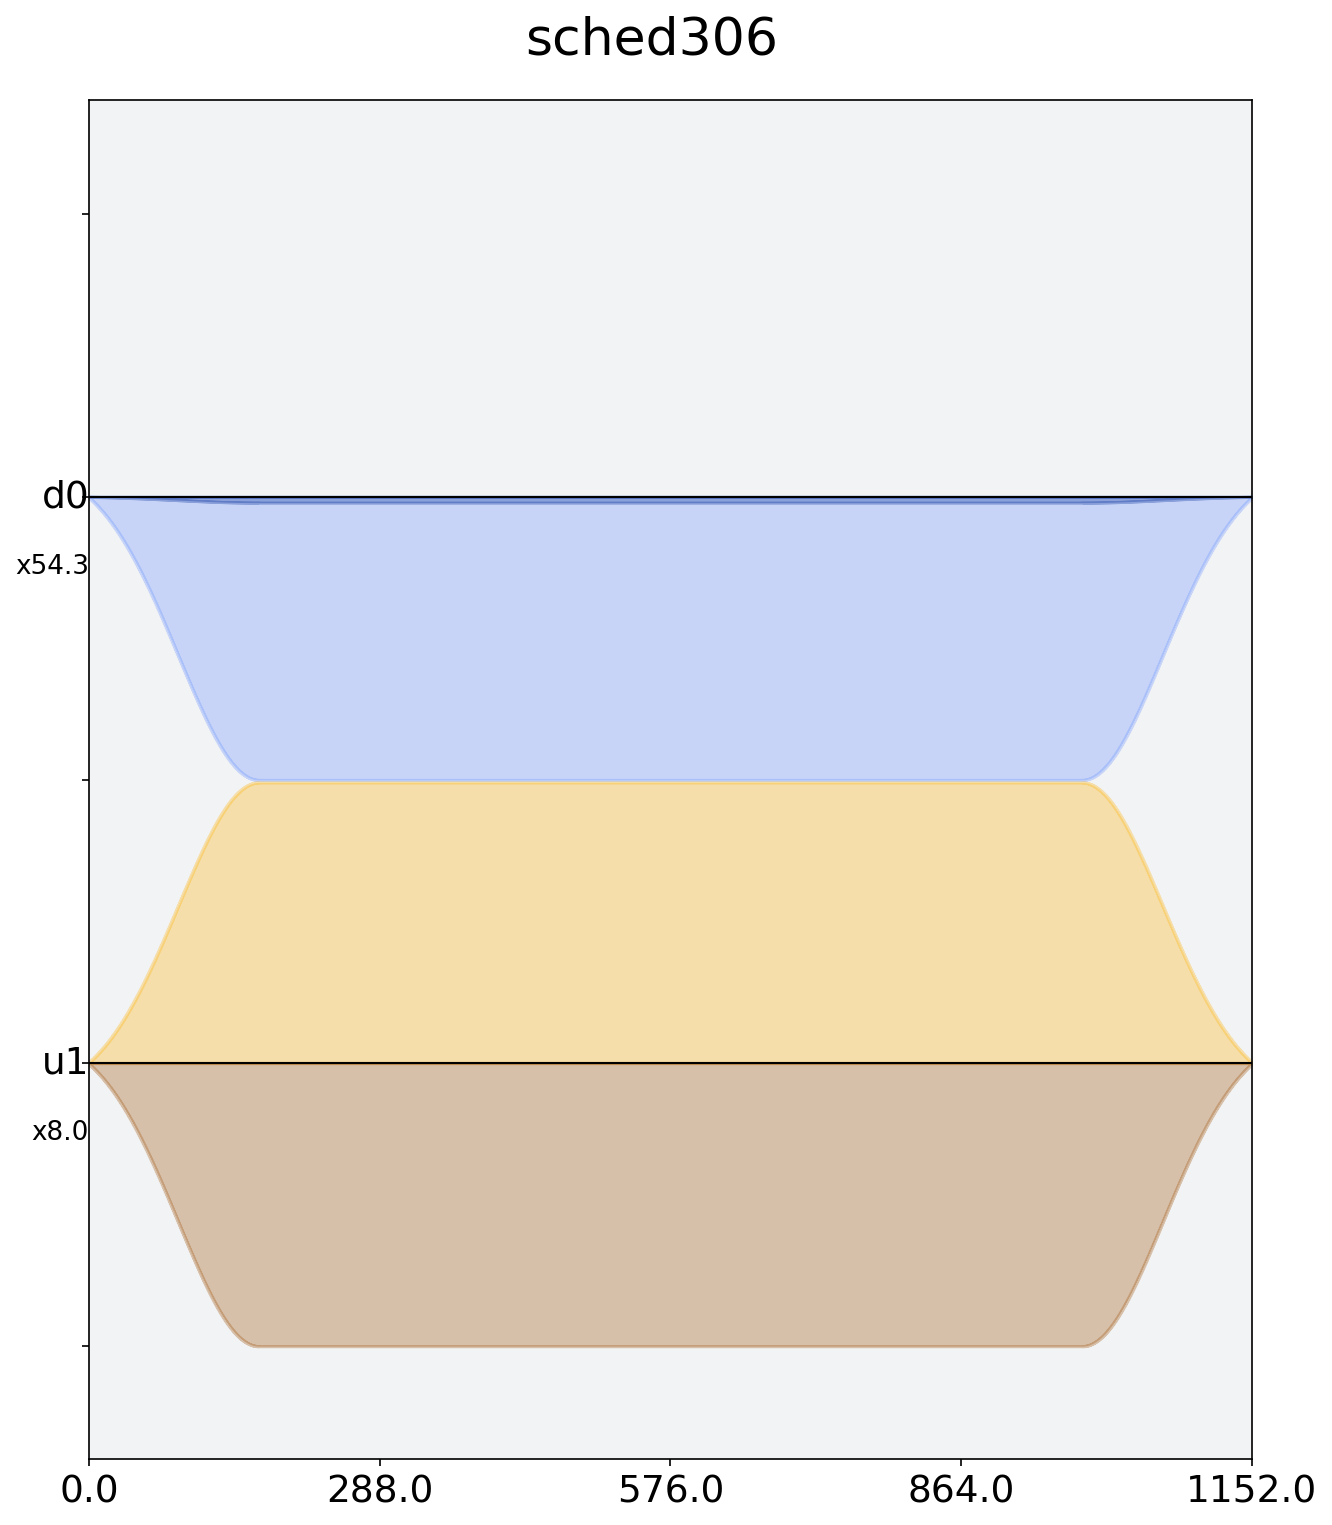

In [50]:
sched = stretch_sub_sched(i[4], factor = 1.3)
sched.draw()

In [51]:
getclosest64*1.1

NameError: name 'getclosest64' is not defined

In [58]:
def stretcher(circ, machine, factor):
    '''
    Input: A circ (without measurement) which is to be converted to a schedule, machine to be 
    transpiled upon, and the factor to be stretched by
    Output: The stretched schedule with measurement
    '''
    num_qubits = circ.num_qubits
    circ_device = transpile(circ, machine)
    sched = schedule(circ_device, machine)
    instrucs = sched.instructions
    
    big_array = instruc_sorter(instrucs)
    stretch_sched = None
    j = 0
    
    for element in big_array: 
        sub_sched = stretch_sub_sched(element, factor)
        
        #first element
        if (j == 0):
            stretch_sched = sub_sched
            #print(stretch_sched.instructions)
            j = 1
        else:
            stretch_sched = stretch_sched.insert(stretch_sched.duration, sub_sched)
            
    #adding measurement
    qubits = [i for i in range(num_qubits)]
    print(num_qubits)
    stretch_sched +=measure(qubits, machine) <<stretch_sched.duration   #([0, 1], backend)
    
    return stretch_sched

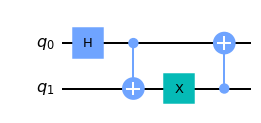

In [59]:
circ = QuantumCircuit(2)
circ.h(0)
circ.cx(0,1)
circ.x(1)
circ.cx(1, 0)
circ.draw(output = 'mpl')

------Old Param
{'duration': 880, 'amp': (0.02393060848436737+0.0004950796954260698j), 'sigma': 64, 'width': 624}
------new Param
1328 (0.015953738989578248+0.0003300531302840465j) 96 944
------Old Param
{'duration': 880, 'amp': (-0.16137275174161397+0.16282590503004865j), 'sigma': 64, 'width': 624}
------new Param
1328 (-0.10758183449440932+0.10855060335336576j) 96 944
------Old Param
{'duration': 880, 'amp': (-0.02393060848436737-0.0004950796954260668j), 'sigma': 64, 'width': 624}
------new Param
1328 (-0.015953738989578248-0.00033005313028404453j) 96 944
------Old Param
{'duration': 880, 'amp': (0.16137275174161395-0.16282590503004868j), 'sigma': 64, 'width': 624}
------new Param
1328 (0.10758183449440929-0.10855060335336579j) 96 944
------Old Param
{'duration': 880, 'amp': (0.02393060848436737+0.0004950796954260698j), 'sigma': 64, 'width': 624}
------new Param
1328 (0.015953738989578248+0.0003300531302840465j) 96 944
------Old Param
{'duration': 880, 'amp': (-0.16137275174161397+0.

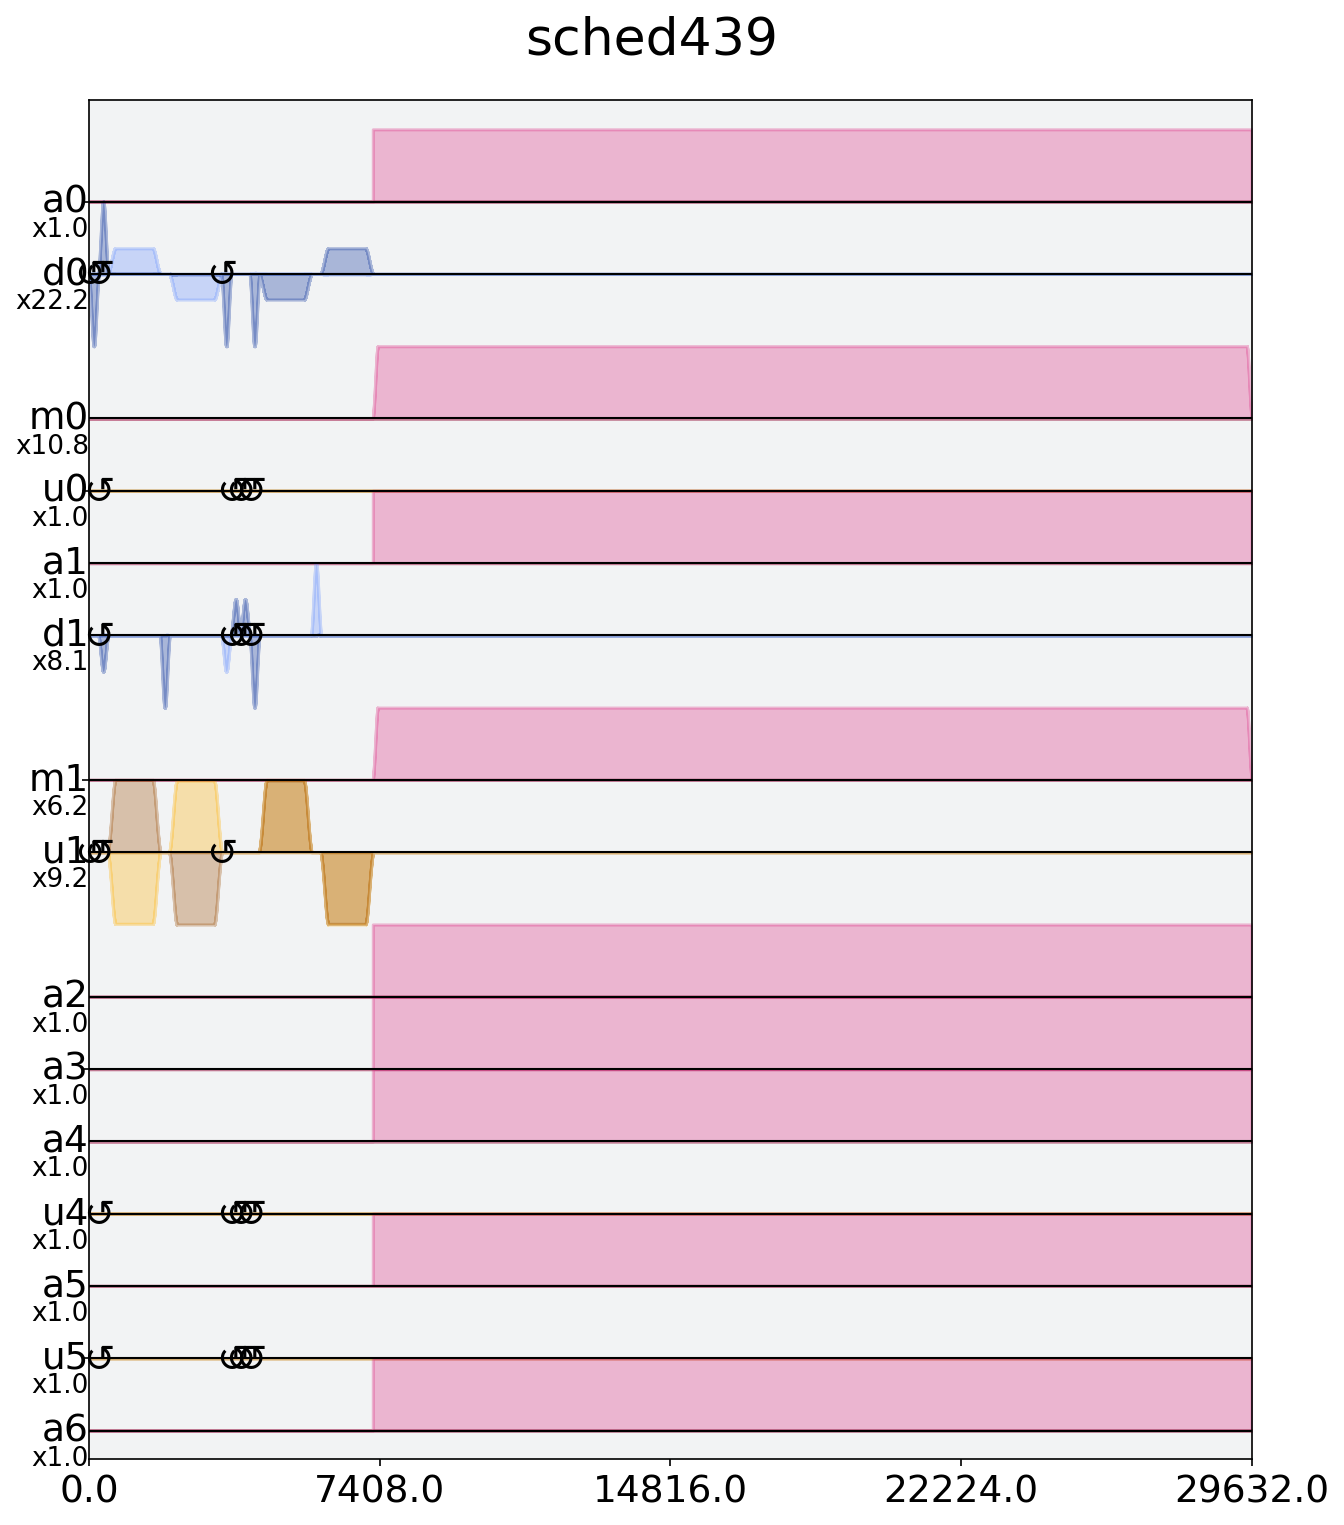

In [61]:
sched = stretcher(circ, factor = 1.5, machine = machine)
sched.draw()

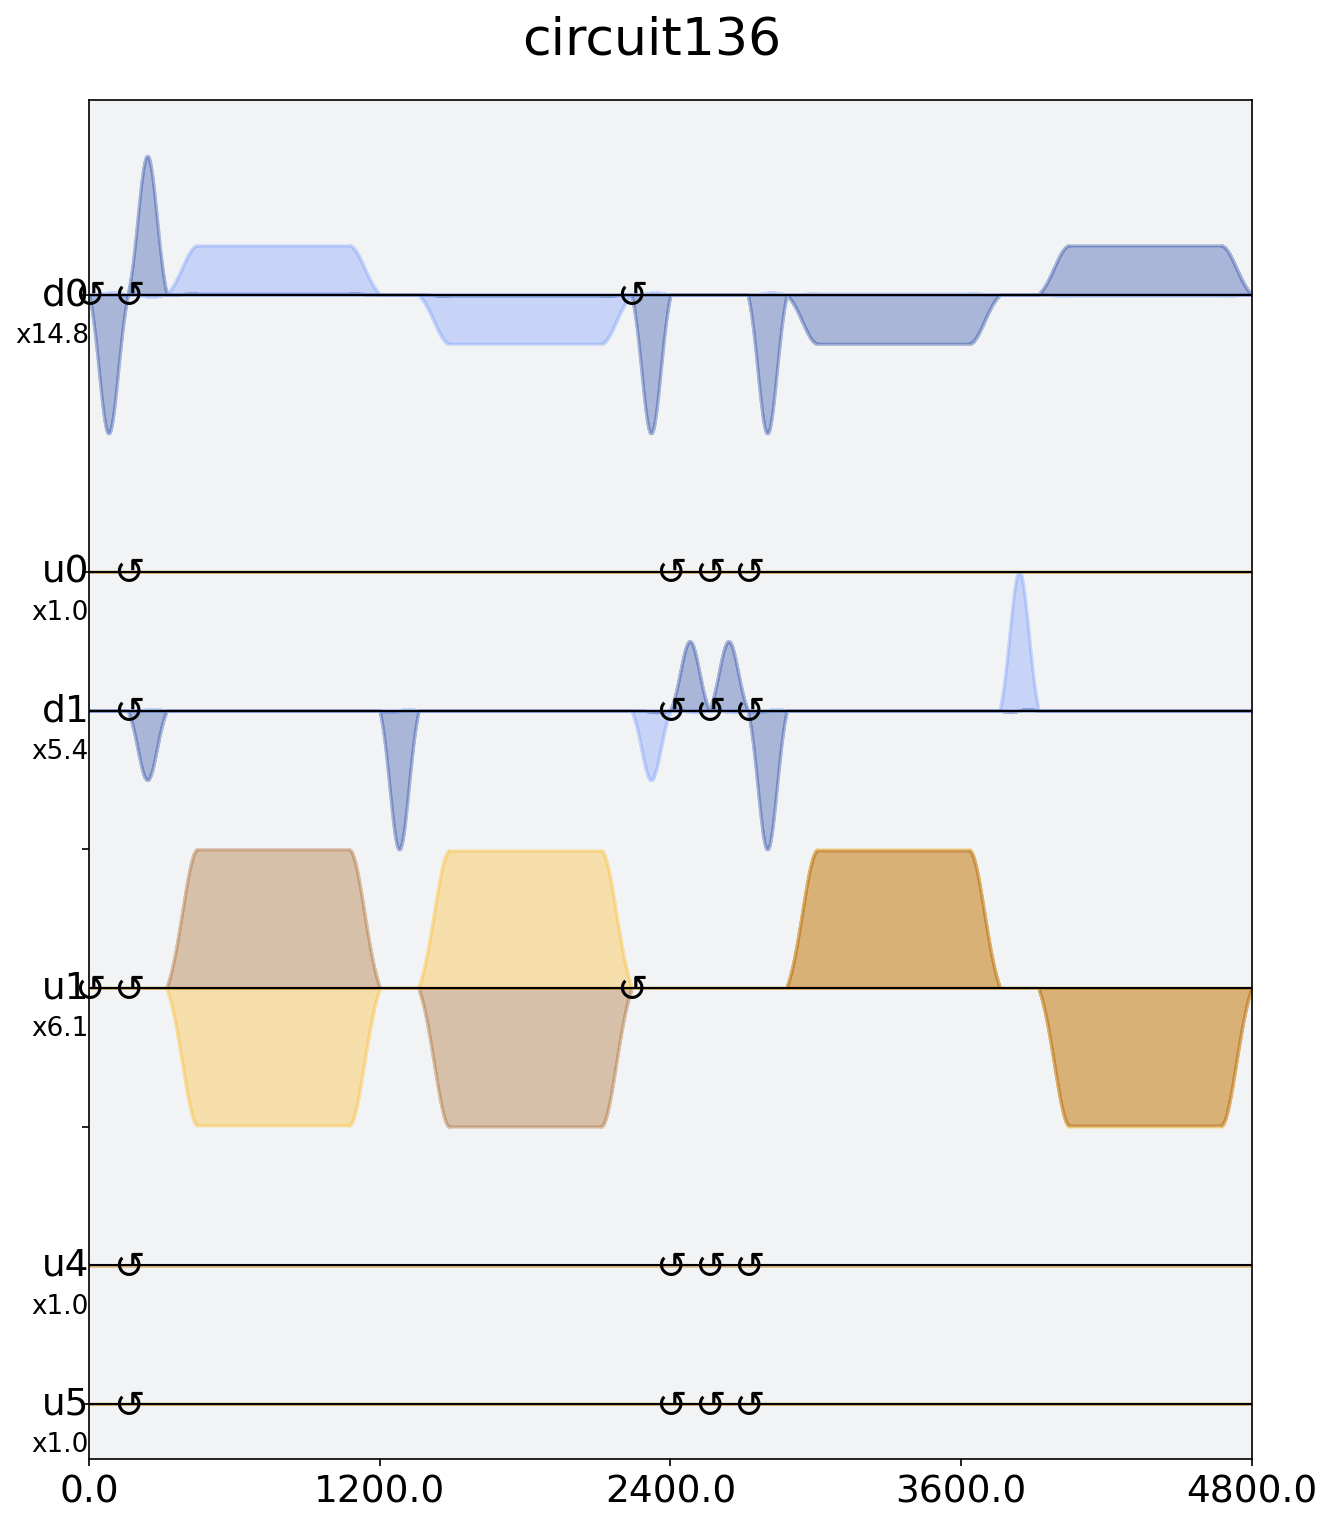

In [62]:
circ = QuantumCircuit(2)
circ.h(0)
circ.cx(0,1)
circ.x(1)
circ.cx(1, 0)
circ_device = transpile(circ, machine)
sched_circ = schedule(circ_device, machine)
sched_circ.draw()

In [1]:
from qiskit import*

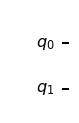

In [3]:
circ = QuantumCircuit(2)
circ.draw(output = 'mpl')


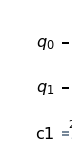

In [4]:
reg = ClassicalRegister(2)
circ.add_register(reg)
circ.draw(output = 'mpl')